In [2]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [23]:
###
from keras.datasets import fashion_mnist

In [24]:
fashion_dict = {0 : "T-shirt/top",
1 : "Trouser",
2 : "Pullover",
3 : "Dress",
4 : "Coat",
5 : "Sandal",
6 : "Shirt",
7 : "Sneaker",
8 : "Bag",
9 : "Ankel boot",
}

In [25]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Dress


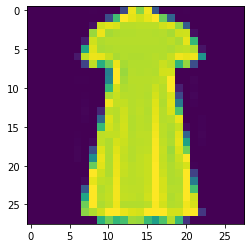

In [27]:
plt.imshow(X_train[0])
print(fashion_dict[y_train[0]])

In [28]:
X_train.shape

(45000, 28, 28)

In [29]:
from keras.layers import Flatten

### X_train --> Flatten --> Dense --> Dense --> Dense --> Dense(output)

In [30]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [32]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="sigmoid"),
        Dense(1024,activation="sigmoid"),
        Dense(512,activation="sigmoid"),
        Dense(output_shape,activation="softmax")
    ]
)

In [36]:
for i in range(1,len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])
np.sum(model1.layers[1].get_weights()[0]) == np.sum(model2.layers[1].get_weights()[0])

True

In [38]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [40]:
print("relu", model1.evaluate(X_test,y_test))
print("sigmoid", model2.evaluate(X_test,y_test))

313/313 [==============================] - 2s 8ms/step - loss: 0.3894 - accuracy: 0.8776
relu [0.389365017414093, 0.8776000142097473]
313/313 [==============================] - 2s 7ms/step - loss: 0.5281 - accuracy: 0.8007
sigmoid [0.5280756950378418, 0.8007000088691711]


In [44]:
### 분포 값 변경 (relu)

In [47]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [51]:
model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(256,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

In [53]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [ ]:
print("relu1", model1.evaluate(X_test,y_test))
print("relu2", model2.evaluate(X_test,y_test))